In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import fnmatch
import matplotlib.pyplot as plt
import progressbar
import os
import sys
import copy
import matplotlib as mpl
sys.path.append(os.path.join(os.getcwd(), '..'))
from prioritizedsr import utils
from prioritizedsr.representations import eig
from prioritizedsr.gridworld import SimpleGrid

cmap = copy.copy(mpl.cm.get_cmap('viridis'))
cmap.set_bad(color='white')

In [2]:
df = pd.read_csv('/tigress/samuelab/PrioritizedSR/logs/four_rooms/results_four_rooms.csv')

In [3]:
env = SimpleGrid(11, block_pattern='four_rooms')
M_uniform = utils.compute_uniform_sr(env, 0.99, [10, 10])

In [ ]:
gs_filter = (df['grid_size'] == 11)
e2o_filter = (df['num_eps_to_optimality'] < 10000)
nr_filter = (df['num_recall'] == 10)

d = df[gs_filter][e2o_filter][nr_filter]
d['dir'] = d['agent'] + '_' + d['exp_id']
d = d.loc[d.groupby('agent').num_eps_to_optimality.idxmin()]

In [56]:
srs = [np.load(os.path.join('/tigress/samuelab/PrioritizedSR/logs/four_rooms', dire, 'M.npy')).flatten() for dire in list(d.dir)]

sr_dict = dict(zip(list(d.agent), srs))
sr_dict['uniform'] = M_uniform.flatten()

df_corr = pd.DataFrame(sr_dict, columns=sr_dict.keys())
corr = df_corr.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-56-da8e6629f2ea>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d = df[gs_filter][e2o_filter][nr_filter]


,dynasr,mdq,mparsr,qparsr,tdsr,uniform
dynasr,1.000000,0.317000,0.222000,0.482000,0.696000,0.257000
mdq,0.317000,1.000000,0.094000,0.358000,0.435000,0.441000
mparsr,0.222000,0.094000,1.000000,0.047000,0.200000,0.071000
qparsr,0.482000,0.358000,0.047000,1.000000,0.652000,0.254000
tdsr,0.696000,0.435000,0.200000,0.652000,1.000000,0.311000
uniform,0.257000,0.441000,0.071000,0.254000,0.311000,1.000000


In [40]:
d

,seed,agent,beta,num_recall,grid_size,lr,gamma,num_eps_to_optimality,wall_clock_time,exp_id,dir
203,5,dynasr,5.0,10,11,0.1,0.99,26,4.642089,184f1f84-fd7a-4730-b83a-b672abe9c62b,dynasr_184f1f84-fd7a-4730-b83a-b672abe9c62b
221,5,mdq,5.0,10,11,0.1,0.99,4,27.730591,2f0fb7d4-b70c-4a22-802b-cf1d7ee7877a,mdq_2f0fb7d4-b70c-4a22-802b-cf1d7ee7877a
123,2,mparsr,5.0,10,11,0.1,0.99,41,10.546755,e5521755-54e0-449a-8e03-359c754119db,mparsr_e5521755-54e0-449a-8e03-359c754119db
144,3,qparsr,5.0,10,11,0.1,0.99,27,2.122257,405caa0c-f4ee-4760-baa8-87209f7f9c03,qparsr_405caa0c-f4ee-4760-baa8-87209f7f9c03
237,9,tdsr,5.0,10,11,0.1,0.99,521,17.857115,e3abc077-9a8b-47e2-84d3-1830c727fc35,tdsr_e3abc077-9a8b-47e2-84d3-1830c727fc35


In [50]:
agent = 'mdq'
M_eigs, _ = eig(sr_dict[agent].reshape(121, 121))
M_eigs = M_eigs.real * (M_eigs.real > 0)
M_eigs = np.reshape(M_eigs.T, [np.minimum(*M_eigs.shape), 11, 11])

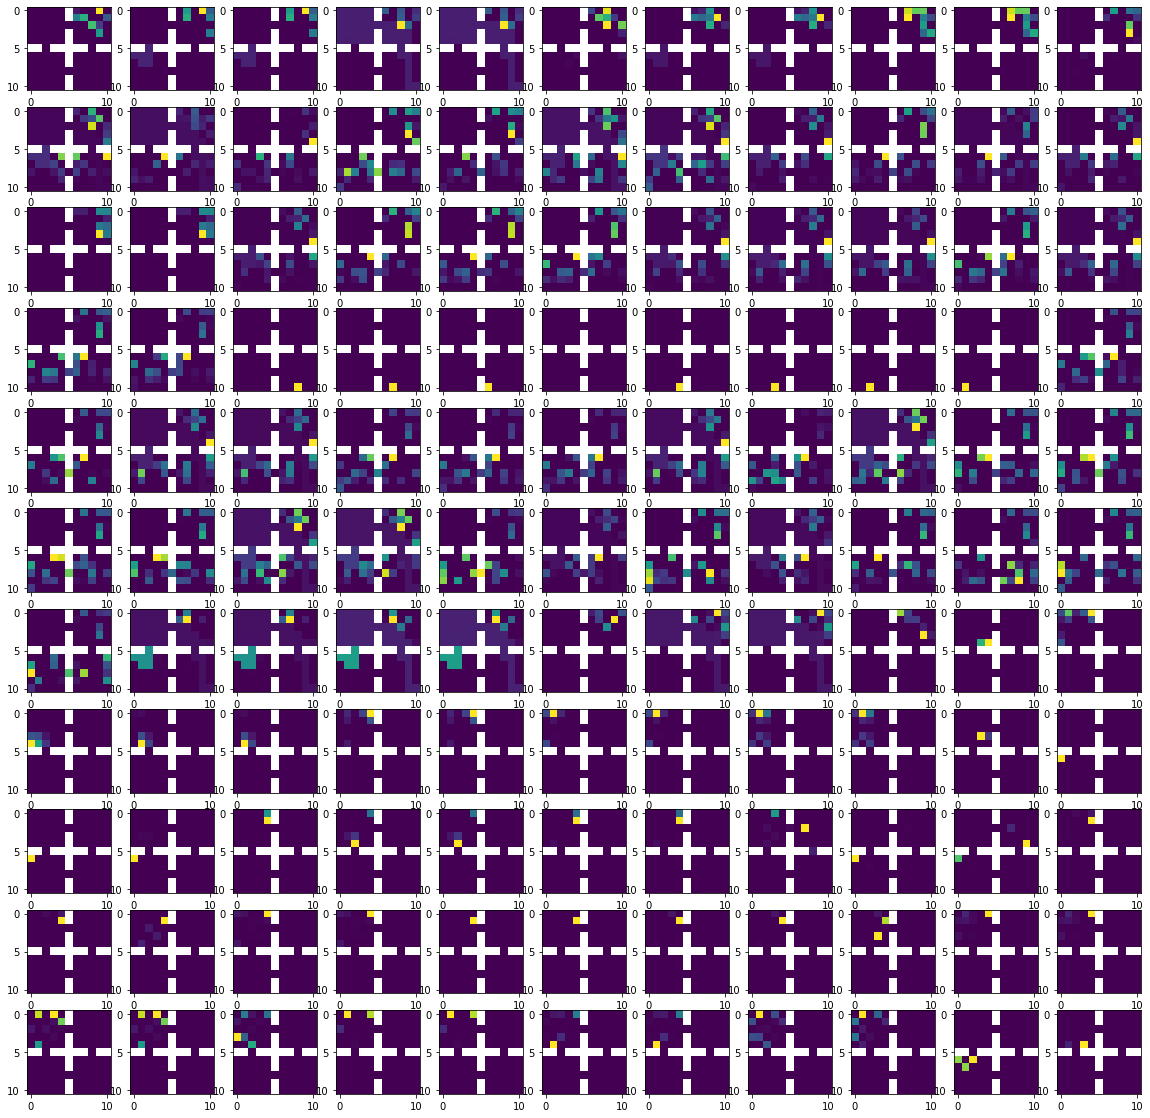

In [51]:
fig, axs = plt.subplots(11, 11, figsize=(20, 20))
env = SimpleGrid(11, block_pattern='four_rooms')

cmap = copy.copy(mpl.cm.get_cmap('viridis'))
cmap.set_bad(color='white')

for i in range(11):
    for j in range(11):
        k = i*11 + j
        axs[i][j].imshow(utils.mask_grid(M_eigs[k], env.blocks), cmap=cmap)

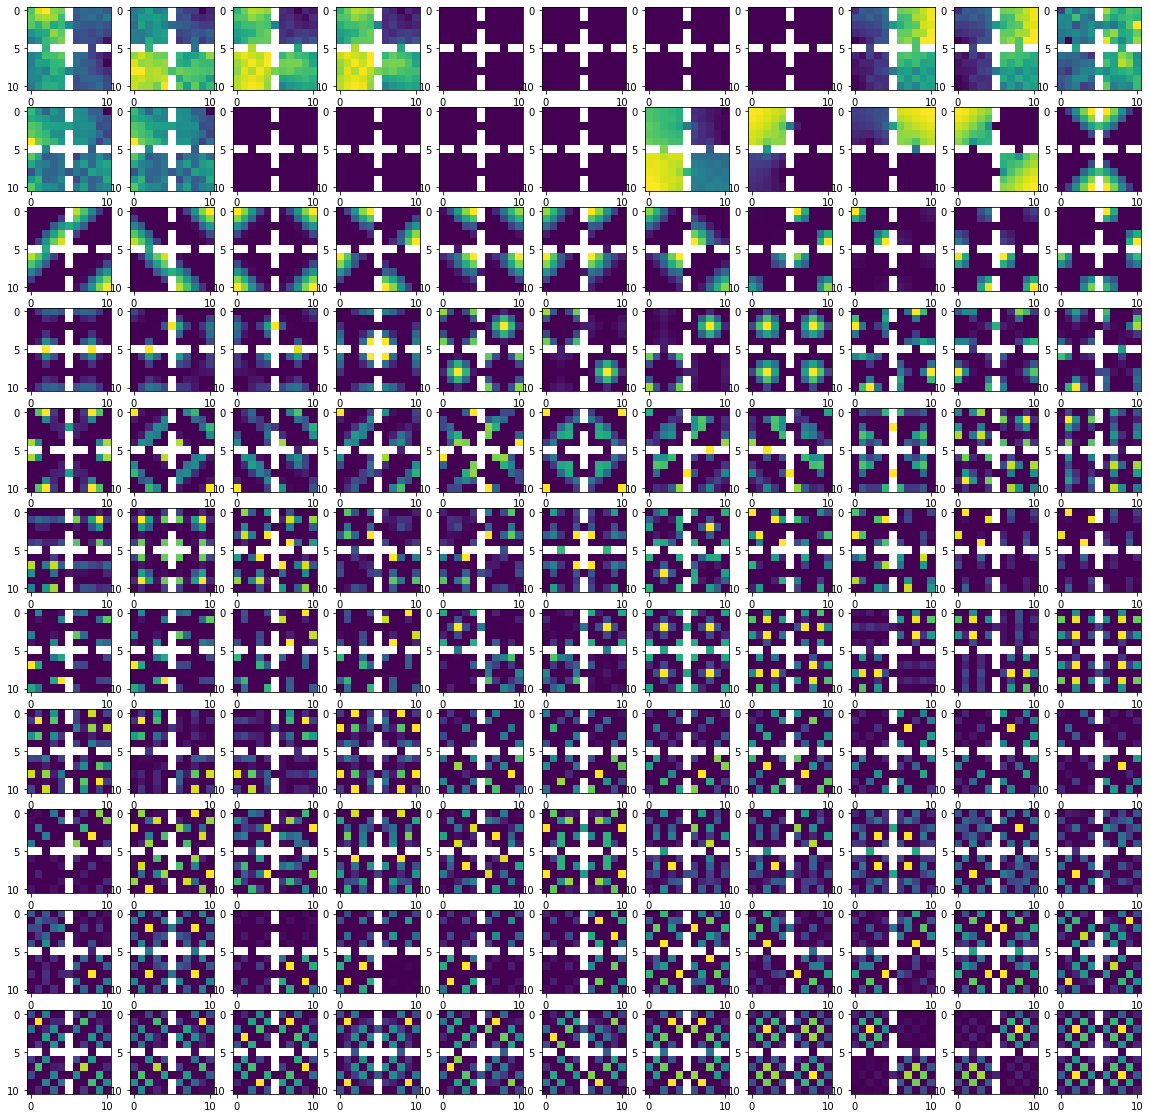

In [53]:
M_eigs, _ = eig(M_uniform.reshape(121, 121))
M_eigs = M_eigs.real * (M_eigs.real > 0)
M_eigs = np.reshape(M_eigs.T, [np.minimum(*M_eigs.shape), 11, 11])

fig, axs = plt.subplots(11, 11, figsize=(20, 20))
env = SimpleGrid(11, block_pattern='four_rooms')

cmap = copy.copy(mpl.cm.get_cmap('viridis'))
cmap.set_bad(color='white')

for i in range(11):
    for j in range(11):
        k = i*11 + j
        axs[i][j].imshow(utils.mask_grid(M_eigs[k], env.blocks), cmap=cmap)

Prioritized States Viz.

In [4]:
gs_filter = (df['grid_size'] == 11)
e2o_filter = (df['num_eps_to_optimality'] < 10000)

d = df[gs_filter][e2o_filter]
d['dir'] = d['agent'] + '_' + d['exp_id']

<ipython-input-4-039bb13575f4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d = df[gs_filter][e2o_filter]


In [5]:
d

,seed,agent,beta,num_recall,grid_size,lr,gamma,num_eps_to_optimality,wall_clock_time,exp_id,dir
123,2,mparsr,5.0,10,11,0.1,0.99,41,10.546755,e5521755-54e0-449a-8e03-359c754119db,mparsr_e5521755-54e0-449a-8e03-359c754119db
124,0,mparsr,5.0,10,11,0.1,0.99,70,16.721762,00b5a81a-c68c-4258-a221-0406da164295,mparsr_00b5a81a-c68c-4258-a221-0406da164295
125,1,mparsr,5.0,10,11,0.1,0.99,119,21.281686,9ba65276-4b6e-40d7-881a-0197696d5faf,mparsr_9ba65276-4b6e-40d7-881a-0197696d5faf
126,4,mparsr,5.0,10,11,0.1,0.99,43,7.530954,e658f549-c02d-45c1-b269-00e8b858f757,mparsr_e658f549-c02d-45c1-b269-00e8b858f757
127,3,mparsr,5.0,10,11,0.1,0.99,117,26.981306,a86e9945-15f2-462e-810c-5dec1a839f35,mparsr_a86e9945-15f2-462e-810c-5dec1a839f35
...,...,...,...,...,...,...,...,...,...,...,...
281,9,dynasr,5.0,10000,11,0.1,0.99,52,5153.206719,7aec0e80-1b6c-49df-bb6e-58f38808f8ed,dynasr_7aec0e80-1b6c-49df-bb6e-58f38808f8ed
282,5,dynasr,5.0,10000,11,0.1,0.99,52,5558.681705,82c5430c-a92a-4e5d-b829-98c0e70e084e,dynasr_82c5430c-a92a-4e5d-b829-98c0e70e084e
283,8,mdq,5.0,10,11,0.1,0.99,175,5548.184787,a3be8526-5282-4683-8034-3e0b7bae199f,mdq_a3be8526-5282-4683-8034-3e0b7bae199f
284,7,dynasr,5.0,1000,11,0.1,0.99,477,5860.133282,0c45c81e-eaf2-43c7-a492-b9c8c830fb7f,dynasr_0c45c81e-eaf2-43c7-a492-b9c8c830fb7f


In [7]:
agents = ['dynasr', 'mdq', 'mparsr', 'qparsr']
ps_dict = dict(zip(agents, [np.zeros(env.state_size) for _ in range(len(agents))]))

for index, row in d.iterrows():
    if row.agent in agents:
        ps = np.load(os.path.join('/tigress/samuelab/PrioritizedSR/logs/four_rooms', row.dir, 'prioritized_states.npy'))
        ps_dict[row.agent] += ps

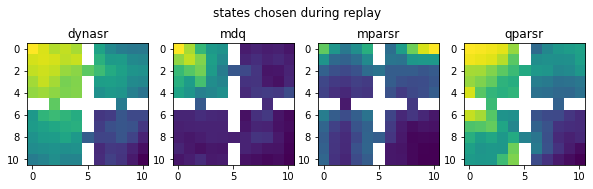

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(10, 20))
plt.suptitle('states chosen during replay', y=0.57)
for i in range(len(agents)):
    axs[i].set_title(agents[i])
    axs[i].imshow(utils.mask_grid(ps_dict[agents[i]].reshape(env.grid_size), env.blocks), cmap=cmap)

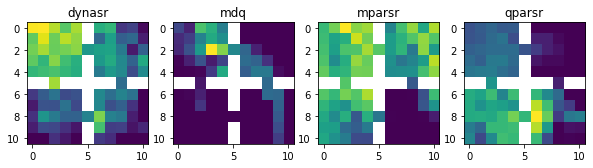

In [61]:
pss = [np.load(os.path.join('/tigress/samuelab/PrioritizedSR/logs/four_rooms', dire, 'prioritized_states.npy')) for dire in list(d.dir)]

fig, axs = plt.subplots(1, 4, figsize=(10, 20))
agents = ['dynasr', 'mdq', 'mparsr', 'qparsr']
for i in range(4):
    axs[i].set_title(agents[i])
    axs[i].imshow(utils.mask_grid(pss[i].reshape(env.grid_size), env.blocks), cmap=cmap)